# **Food Image Classification**

### **Background & Context**

Image classification has become less complicated with deep learning and the availability of larger datasets and computational assets. The convolution neural network is the most popular and extensively used image classification technique in recent days.

Clicks is a stock photography company and is an online source of images available for people and companies to download. Photographers from all over the world upload food-related images to the stock photography agency every day. Since the volume of the images that get uploaded daily will be high, it will be difficult for anyone to label the images manually.

### **Objective:**

Clicks have decided to use only three categories of food (Bread, Soup, and Vegetables-Fruits) for now, and need to build a classification model using a dataset consisting of images that would help to **label the images into different categories**.

1. Load and understand the dataset
2. Automatically label the images
3. Perform Data Augmentation
4. Build a classification model for this problem using CNNs
5. Improve the model's perofrmance through Transfer Learning


### **Dataset Information:**

The dataset folder contains different food images. The images are already split into Training and Testing folders. Each folder has three more subfolders named Bread, Soup, and Vegetables-Fruits. These folders have images of the respective classes.

### **Importing Libraries**

In [ ]:
# Library for creating data paths
import os

# Library for randomly selecting data points
import random

# Library for performing numerical computations
import numpy as np

# Library for creating and showing plots
import matplotlib.pyplot as plt

# Library for reading and showing images
import matplotlib.image as mpimg

import cv2    ## an important module to get imported which may even cause issues while reading the data if not used

import pandas as pd
import seaborn as sns
import tensorflow as tf
import keras

# Importing all the required sub-modules from Keras
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation, Input, LeakyReLU
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical    # to perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD    # optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping    # regularization method to prevent overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers



Mount the drive to load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/MyDrive/AIML/Food_Data.zip"

Archive:  /content/drive/MyDrive/AIML/Food_Data.zip
   creating: Food_Data/Testing/
   creating: Food_Data/Testing/Bread/
  inflating: Food_Data/Testing/Bread/0.jpg  
  inflating: Food_Data/Testing/Bread/1.jpg  
  inflating: Food_Data/Testing/Bread/10.jpg  
  inflating: Food_Data/Testing/Bread/100.jpg  
  inflating: Food_Data/Testing/Bread/101.jpg  
  inflating: Food_Data/Testing/Bread/102.jpg  
  inflating: Food_Data/Testing/Bread/103.jpg  
  inflating: Food_Data/Testing/Bread/104.jpg  
  inflating: Food_Data/Testing/Bread/105.jpg  
  inflating: Food_Data/Testing/Bread/106.jpg  
  inflating: Food_Data/Testing/Bread/107.jpg  
  inflating: Food_Data/Testing/Bread/108.jpg  
  inflating: Food_Data/Testing/Bread/109.jpg  
  inflating: Food_Data/Testing/Bread/11.jpg  
  inflating: Food_Data/Testing/Bread/110.jpg  
  inflating: Food_Data/Testing/Bread/111.jpg  
  inflating: Food_Data/Testing/Bread/112.jpg  
  inflating: Food_Data/Testing/Bread/113.jpg  
  inflating: Food_Data/Testing/Bread/1

The images are stored in structured folders, and below we create the data paths to load images from those folders. This is required so that we can extract images in an auto-labelled fashion using Keras **flow_from_directory**.

**Reading the Training Data**

In [ ]:
# Storing the training path in a variable named DATADIR, and storing the unique categories/labels in a list

DATADIR = "/content/Food_Data/Training"                                     # Path of training data after unzipping
CATEGORIES = ["Bread", "Soup", "Vegetable-Fruit"]                               # Storing all the categories in categories variable
IMG_SIZE = 150                                                                  # Defining the size of the image to 150

In [ ]:
# Create a User Defined Function create_training_data() to extract the images from the directory

training_data = []                                                              # Storing all the training images

def create_training_data():
  for category in CATEGORIES:                                                   # Looping over each category from the CATEGORIES list
    path = os.path.join(DATADIR, category)                                      # Joining images with labels
    class_num = category
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img))                           # Reading the data
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))                   # Resizing the images
      training_data.append([new_array, class_num])                              # Appending both the images and labels
create_training_data()

**Reading the Testing Data**

In [ ]:
# Storing the testing path in a variable named DATADIR_test, and storing the unique categories/labels in a list

DATADIR_test = "/content/Food_Data/Testing"                                     # Path of testing data after unzipping
CATEGORIES = ["Bread", "Soup", "Vegetable-Fruit"]                               # Storing all the categories in categories variable
IMG_SIZE = 150                                                                  # Defining the size of the image to 150

In [ ]:
# Create a User Defined Function create_testing_data() to extract the images from the directory

testing_data = []                                                               # Storing all the testing images

def create_testing_data():
  for category in CATEGORIES:                                                   # Looping over each category from the CATEGORIES list
    path = os.path.join(DATADIR, category)                                      # Joining images with labels
    class_num = category
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img))                           # Reading the data
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))                   # Resizing the images
      testing_data.append([new_array, class_num])                               # Appending both the images and labels
create_testing_data()

**Let's visualize images randomly from each of the four classes**

In [ ]:
# Creating 3 different lists to store the image names for each category by reading them from their respective directories.

bread_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}')]            # Looping over the path of each image from the bread directory
soup_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}')]             # Looping over the path of each image from the soup directory
veg_fruit_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}')]        # Looping over the path of each image from the vegetables-fruit directory


# Randomly selecting 3 images from each category
select_bread = np.random.choice(bread_imgs, 3, replace = False)
select_soup = np.random.choice(soup_imgs, 3, replace = False)
select_veg_fruit = np.random.choice(veg_fruit_imgs, 3, replace = False)

NameError: name 'image' is not defined

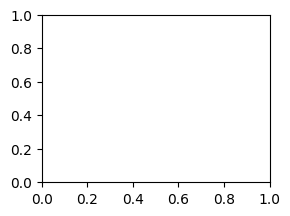

In [ ]:
# plotting 4 x 3 image matrix
fig = plt.figure(figsize= (10,10))

# Plotting three images from each of the four categories by looping their path
for i in range(9):
  if i < 3:
    fp = f'{DATADIR}/{CATEGORIES[0]}/{select_bread[i]}'                         # Here datadir is a path to the training data and categories[0] indicate the first label bread and we are looping over to take the three random images that we have stored in select_galo variable
    label = 'Bread'
  if i >= 3 and i<6:
    fp = f'{DATADIR}/{CATEGORIES[1]}/{select_soup[i-3]}'                        # Here datadir is a path to the training data and categories[1] indicate the second label soup and we are looping over to take the three random images that we have stored in select_menin variable
    label = 'Soup'
  if i >= 6 and i<9:
    fp = f'{DATADIR}/{CATEGORIES[2]}/{select_veg_fruit[i-6]}'                   # Here datadir is a path to the training data and categories[2] indicate the first label vegetables-fruit and we are looping over to take the three random images that we have stored in select_no_t variable
    label = 'Vegetable_Fruit'
  ax = fig.add_subplot(4, 3, i+1)

  # Plotting each image using load_img function

  fn = image.load_img(fp, target_size = (150,150))
  plt.imshow(fn, cmap='Greys_r')
  plt.title(label)
  plt.axis('off')
plt.show()

## **Data Preprocessing**

In [ ]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_train = []
y_train = []
np.random.shuffle(training_data)                                                # Shuffling data to reduce variance and making sure that the model remains general and overfits less
for features, label in training_data:                                           # Iterating over the training data which is generated from the create_training_data() function
    X_train.append(features)                                                    # Appending images into X_train
    y_train.append(label)                                                       # Appending labels into y_train

In [ ]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_test = []
y_test = []
np.random.shuffle(testing_data)                                                # Shuffling data to reduce variance and making sure that the model remains general and overfits less
for features, label in testing_data:                                           # Iterating over the testing data which is generated from the create_testing_data() function
    X_test.append(features)                                                    # Appending images into X_test
    y_test.append(label)                                                       # Appending labels into y_test

In [ ]:
# Converting the list into DataFrame
y_train = pd.DataFrame(y_train, columns=["Label"], dtype=object)
y_test = pd.DataFrame(y_test, columns=["Label"], dtype=object)

## **Exploratory Data Analysis**

In [ ]:
# Storing the value counts of target variable

count = y_train.Label.value_counts()
print(count)
print('*'*10)
count = y_train.Label.value_counts(normalize=True)
print(count)

Soup               1500
Bread               994
Vegetable-Fruit     709
Name: Label, dtype: int64
**********
Soup               0.468311
Bread              0.310334
Vegetable-Fruit    0.221355
Name: Label, dtype: float64


In [ ]:
# Converting the pixel values into Numpy array

X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
X_train.shape

(3203, 150, 150, 3)

**NOTE**

Images are digitally represented in the form of numpy arrays which can be observed from the X_train values generated above, so it is possible to perform all the preprocessing operations and build our CNN model using numpy arrays directly. So, evn if the data is provided in the form of numpy arrays rather than images, we can use this to work on our model.

Since the given data is stored in X_train, X_test, y_train, and y_test variables, there is no need to split the data further.


**Normalizing the data**

In neural networks, it is always suggested to **normalize the feature inputs**.
Normalization has the below benefits while training a neural network model:

1.   **Normalization makes the training faster and reduces the chances of getting stuck at local optima**
2.   In deep neural networks, **normalization helps to avoid exploding gradient problems**. Gradient exploding problems occur when large error gradients accumulate and result in very large updates to neural network model weights during training. This makes a model unstable and unable to learn from the training data.

As we know image pixel **values range from 0-255**, here we are simply **dividing all the pixel values by 255 to standardize all the images to have values between 0-1**



In [ ]:
# Normalize the image data
X_train = X_train / 255.0

## Encoding Target Variable

LabelBinarizer is another technique used to encode the target variables which reduces the sparsity as compared to one hot encoder.

For Example: if we have 4 classes as "Good", "Better", "Okay" and "Bad", after applying LableBinarizeron these 4 classes, the output result will be in the form of an array.


*   [1, 0, 0, 0] ------------- Good
*   [0, 1, 0, 0] ------------- Better
*   [0, 0, 1, 0] ------------- Okay
*   [0, 0, 0, 1] ------------- Bad

Each class will be represented in the form of an array.




*   List item



In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Storing the LabelBinarizer function in lb variable
lb = LabelBinarizer()

# Applying fit_transform on train target variable
y_train_e = lb.fit_transform(y_train)

# Applying fit_transform on test target variable
y_test_e = lb.fit_transform(y_test)

## **Model Building**

- CNN

#### **Convolutional Neural Network (CNN)**

**Model 1:**

In [ ]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

- **Filters**: 256 - Number of filters in the first hidden layer. This is also called a **Kernel**
- **Kernel_Size**: The kernel size here refers to the width x height of the filter mask. The kernel_size must be an odd integer as well. Typical values for kernel_size include: (1, 1), (3, 3), (5, 5), (7, 7).
- **Padding**: The Padding type is called SAME because the output size is the same as the input size(when stride=1). Using 'SAME' ensures that the filter is applied to all the elements of the input. Normally, padding is set to 'SAME' while training the model. Output size is mathmatically convenient for further computation.
- **MaxPool2D**: Max Pooling is a pooling operation that calculates the maximum value for patches of a feature map, and uses it to create a downsampled (pooled) feature map. It is usually used after a convolutional layer.
- **Flatten**: Flattinging is converting the data into a 1-dimensional array for giving them as input to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer.

In [ ]:
# Initializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3 x 3, padding 'same' provides the output size that's the same as the input size
# Input_shape denotes input image dimension of MNIST images
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150,150,3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(100, activation='relu'))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(3, activation='softmax'))

# Using SGD optimizer
opt = SGD(learning_rate = 0.01, momentum=0.9)

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 19, 32)        0

1. If the probelm is having three classes to predict, then the neurons in the output layer will be 3.

**model.add(Dense(3, activation= "softmax")**

2. If the problem is having 10 classes to predict, then the neurons in the output layer will be 10.

**model.add(Dense(10, activation= "softmax")**

As we can see from the above summary, this CNN model will train and learn 1,185,107 parameters **(weights and biases)**.

Let's now compile and train the model using the train data. Here, we are using the loss function - categorical_crossentropy as this is a multi-class classification problem. We will try to minimize this loss at every iteration using the optimizer of our choice. Also, we are choosing accuracy as the metric to measure the performance of the model.

**Early Stopping** is a technique similar to cross-validation where a part of training data is kept as the validation data. When the performance of the validation data starts worsening, the model will immediately stop the training.
- **Monitor**: Quantity to be monitored
-**Mode**: One of {"auto", "min", "max"}. In **min** mode, training will stop when the quantity monitored has stopped decreasing; in **max** mode it will stop when the quantity monitored has stopped increasing; in **auto** mode, the direction is automatically inferred from the name of the monitored quantity.
- **Patience**: Number of epochs with no improvement after which training will be stopped.

**ModelCheckpoint** callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or wrights can be loaded later to continue the training from the state saved.

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fitting the model with 30 epochs and validation_split as 10%
history=model.fit(X_train,
                  y_train_e,
                  epochs=30,
                  batch_size=32, validation_split=0.10, callbacks=[es, mc])

Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.0483 - accuracy: 0.4552
Epoch 1: val_accuracy improved from -inf to 0.42679, saving model to best_model.h5
91/91 [==============================] - 8s 38ms/step - loss: 1.0483 - accuracy: 0.4552 - val_loss: 1.1208 - val_accuracy: 0.4268
Epoch 2/30
 3/91 [..............................] - ETA: 2s - loss: 1.1031 - accuracy: 0.4583

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/91 [============================>.] - ETA: 0s - loss: 0.9653 - accuracy: 0.5181
Epoch 2: val_accuracy improved from 0.42679 to 0.44860, saving model to best_model.h5
91/91 [==============================] - 3s 28ms/step - loss: 0.9651 - accuracy: 0.5184 - val_loss: 1.1026 - val_accuracy: 0.4486
Epoch 3/30
89/91 [============================>.] - ETA: 0s - loss: 0.8563 - accuracy: 0.5779
Epoch 3: val_accuracy improved from 0.44860 to 0.53894, saving model to best_model.h5
91/91 [==============================] - 2s 25ms/step - loss: 0.8553 - accuracy: 0.5784 - val_loss: 0.8549 - val_accuracy: 0.5389
Epoch 4/30
90/91 [============================>.] - ETA: 0s - loss: 0.7652 - accuracy: 0.6052
Epoch 4: val_accuracy did not improve from 0.53894
91/91 [==============================] - 2s 26ms/step - loss: 0.7651 - accuracy: 0.6055 - val_loss: 1.8348 - val_accuracy: 0.3738
Epoch 5/30
89/91 [============================>.] - ETA: 0s - loss: 0.8394 - accuracy: 0.6025
Epoch 5: val_accuracy 

**Plotting Accuracy vs Epoch Curve**

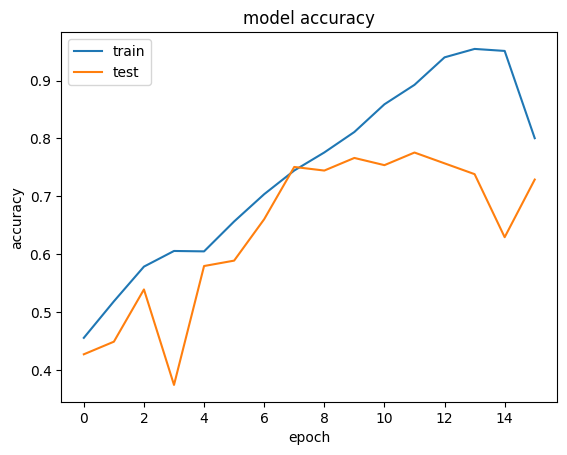

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

From the plot, the model is overfitting.

In [ ]:
model.evaluate(X_test, (y_test_e))

101/101 [==============================] - 1s 11ms/step - loss: 204.9011 - accuracy: 0.5670


[204.90106201171875, 0.5669684410095215]

In [ ]:
# Test Prediction
y_test_pred_ln = model.predict(X_test)
y_test_pred_classes_ln = np.argmax(y_test_pred_ln, axis=1)
normal_y_test = np.argmax(y_test_e, axis=1)

101/101 [==============================] - 1s 6ms/step


Since we have converted the target variable into a NumPy array using labelbinarizer, now we are converting the target variable into its original form by using the numpy.argmax() function which returns indices of the max element of the aray in t a particular axis and this original form of target will be used in calculating the accuracy, and plotting the confusion matrix.

In [ ]:
# Test Accuracy
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(normal_y_test, y_test_pred_classes_ln)

0.5669684670621292

<Axes: >

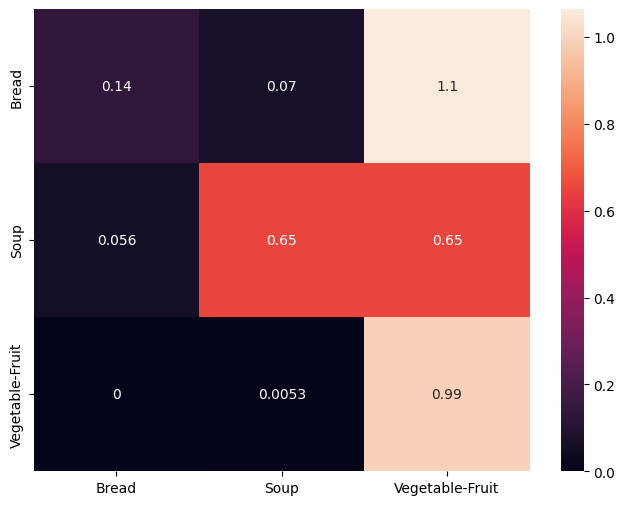

In [ ]:
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

The model is giving about 67% accuracy on the test data

### **Model 2**:

Building another CNN model with more layers added to the it.

In [ ]:
backend.clear_session()

# Fixing the seed for random number generators to ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)


In [ ]:
# Initialize a sequential model
model_3 = Sequential()

# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model_3.add(Conv2D(filters = 256, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (150,150,3)))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPooling2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_3.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_3.add(Dropout(0.3))

# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_3.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_3.add(Dropout(0.3))


# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_3.add(Flatten())
# adding first fully connected dense layer with 1024 neurons
model_3.add(Dense(64, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
model_3.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons
model_3.add(Dense(32, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
model_3.add(Dropout(0.5))

# adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem with 3 classes.
model_3.add(Dense(3, activation = "softmax"))

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 256)     19456     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 256)       0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       819328    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 37, 37, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)       

As we can see from the above summary, this CNN model will train and learn **1,099,171 parameters (weights and biases)**.

Let's now compile and train the model using the train data. Here, we are using the loss function - categorical_crossentropy as this is a multi-class classification problem. We will try to minimize this loss at every iteration using the optimizer of our choice. Also, we are choosing accuracy as the metric to measure the performance of the model.

In [ ]:
optimizer = Adam(lr=0.001)
model_3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model_3.fit(X_train,
          y_train_e,
          epochs=30,
          batch_size=32,validation_split=0.10,callbacks=[es, mc],use_multiprocessing=True)

Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.0753 - accuracy: 0.4403
Epoch 1: val_accuracy improved from -inf to 0.42679, saving model to best_model.h5
91/91 [==============================] - 29s 183ms/step - loss: 1.0753 - accuracy: 0.4403 - val_loss: 1.0662 - val_accuracy: 0.4268
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/91 [============================>.] - ETA: 0s - loss: 1.0518 - accuracy: 0.4698
Epoch 2: val_accuracy improved from 0.42679 to 0.45171, saving model to best_model.h5
91/91 [==============================] - 14s 153ms/step - loss: 1.0517 - accuracy: 0.4702 - val_loss: 0.9873 - val_accuracy: 0.4517
Epoch 3/30
90/91 [============================>.] - ETA: 0s - loss: 0.9775 - accuracy: 0.5337
Epoch 3: val_accuracy did not improve from 0.45171
91/91 [==============================] - 14s 154ms/step - loss: 0.9776 - accuracy: 0.5333 - val_loss: 1.0550 - val_accuracy: 0.4330
Epoch 4/30
90/91 [============================>.] - ETA: 0s - loss: 0.9141 - accuracy: 0.5472
Epoch 4: val_accuracy improved from 0.45171 to 0.53271, saving model to best_model.h5
91/91 [==============================] - 14s 154ms/step - loss: 0.9142 - accuracy: 0.5472 - val_loss: 0.8963 - val_accuracy: 0.5327
Epoch 5/30
90/91 [============================>.] - ETA: 0s - loss: 0.8302 - accuracy: 0.6017
Epoch 5: val_acc